# __Social Media and Network Analytics__

## __EDA__

### Import and concat datasets:

In [19]:
import pandas as pd

youtube_df = pd.read_csv('../all_youtube_comments.csv')

youtube_df.head(5)

,video_id,text,author,likes,date,time,year,met_gala_year
0,iWS3oVeyjL4,30:07 I IMMEDIATELY thought the theme was the ...,@KindnessKillsNONDO,0,2025-05-14,11:00:00,2025,2025
1,iWS3oVeyjL4,nicki the best,@kaiwenro-s5z,0,2025-05-14,09:00:00,2025,2025
2,iWS3oVeyjL4,"I love Ayo's look, the beading is stunning",@StelViri,0,2025-05-14,08:00:00,2025,2025
3,iWS3oVeyjL4,"I wonder if people who wore more ""boring"" outf...",@mesnchz,0,2025-05-14,08:00:00,2025,2025
4,iWS3oVeyjL4,I've loved your channel for years but the amou...,@marie-clairewood,0,2025-05-14,06:00:00,2025,2025


### Data collected count relative to Met Gala year:

In [20]:
year_counts = youtube_df.groupby('met_gala_year').size().reset_index(name='count')

year_counts = year_counts.sort_values('met_gala_year')

print("YouTube Comments Count by Year:")
print("============================")
print(year_counts.to_string(index=False))
print("\n")

YouTube Comments Count by Year:
 met_gala_year  count
          2021    752
          2022   2000
          2023   2000
          2024   1753
          2025   3000




In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import string
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

# Function to process text and return tokens
def process_text(text):
    if not isinstance(text, str):
        return [], 0, 0
    
    # Convert to lowercase
    text = text.lower()
    
    # Save original word count
    original_words = len(text.split())
    
    # Remove timestamps (like 18:23, 30:07)
    text = re.sub(r'\d+:\d+', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove punctuation
    text = re.sub(f'[{re.escape(string.punctuation)}]', ' ', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove emojis and non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Additional YouTube-specific stop words
    additional_stop_words = {'like', 'video', 'youtube', 'watch', 'subscribe', 'channel', 'comment',
                           'thought', 'just', 'really', 'actually', 'time', 'people', 'good', 'great',
                           'know', 'thing', 'going', 'look', 'looking', 'looks', 'looked', 'see', 'saw',
                           'seen', 'got', 'get', 'getting', 'went', 'go', 'goes', 'going'}
    
    all_stop_words = stop_words.union(additional_stop_words)
    
    # Split into tokens
    tokens = text.split()
    
    # Filter out stop words and short words
    filtered_tokens = [word for word in tokens if word not in all_stop_words and len(word) > 2]
    
    # Count words dropped
    words_dropped = original_words - len(filtered_tokens)
    
    return filtered_tokens, words_dropped, original_words

Amount of words in text fields: 1176965
Amount of words dropped: 621620


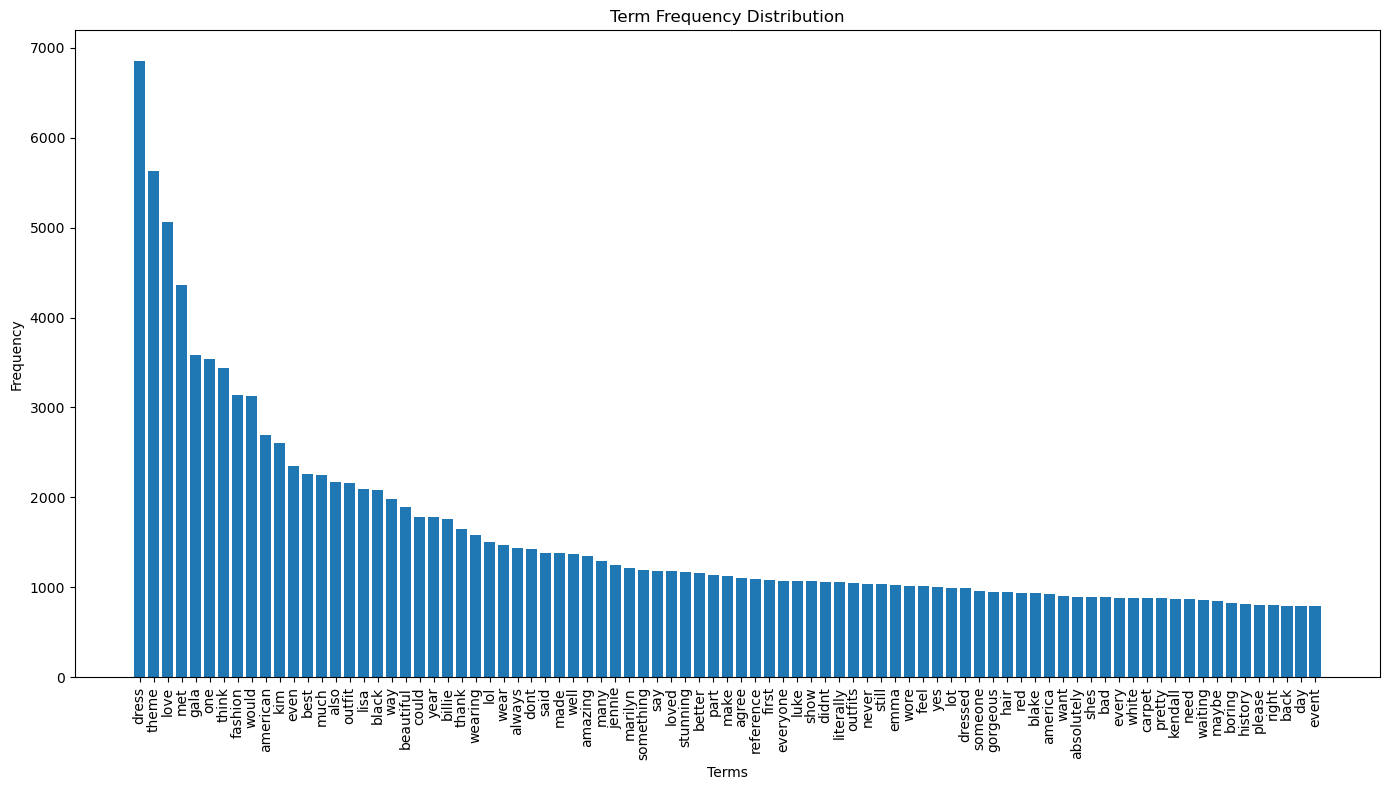

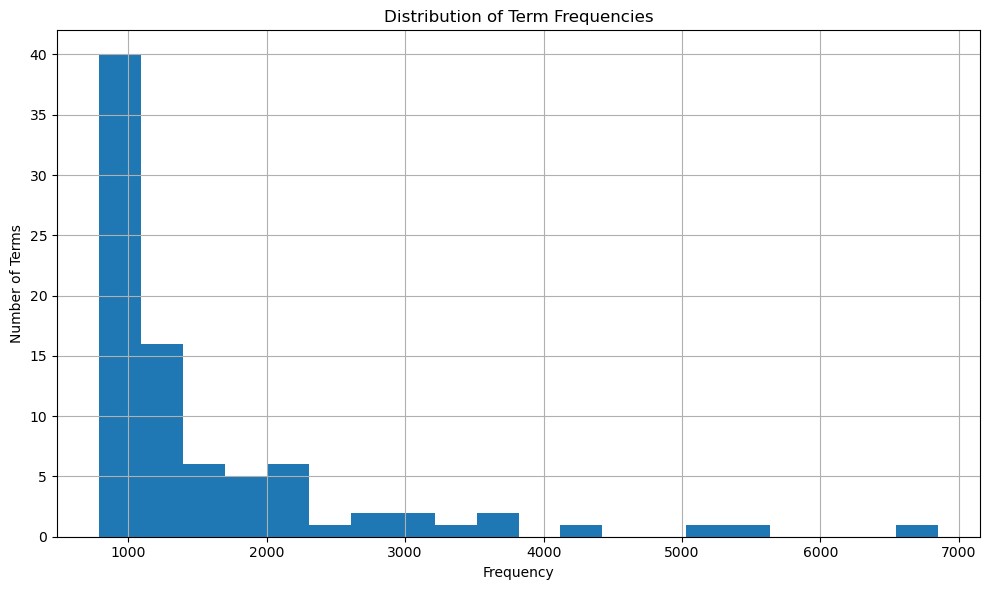

In [ ]:
# Set the number of most frequent terms to display
freq_num = 85

# Create term frequency counter
term_freq_counter = Counter()

# Process the text column in the DataFrame
total_words_dropped = 0
total_words_dataset = 0

# Process each comment text
for comment_text in youtube_df['text']:
    if isinstance(comment_text, str):
        tokens, words_dropped, total_words = process_text(comment_text)
        term_freq_counter.update(tokens)
        total_words_dropped += words_dropped
        total_words_dataset += total_words

print(f"Amount of words in text fields: {total_words_dataset}")
print(f"Amount of words dropped: {total_words_dropped}")

# Get the most common terms for visualisation
most_common = term_freq_counter.most_common(freq_num)

# Create visualisation if we have data
if most_common:
    # Create histogram of term frequencies
    terms, counts = zip(*most_common)
    
    # Create a bar chart
    plt.figure(figsize=(14, 8))
    plt.bar(range(len(terms)), counts, align='center')
    plt.xticks(range(len(terms)), terms, rotation=90)
    plt.xlabel('Terms')
    plt.ylabel('Frequency')
    plt.title('Term Frequency Distribution')
    plt.tight_layout()
    plt.show()
    
    # Create a histogram of frequency values to show the distribution pattern
    plt.figure(figsize=(10, 6))
    plt.hist(counts, bins=20)
    plt.xlabel('Frequency')
    plt.ylabel('Number of Terms')
    plt.title('Distribution of Term Frequencies')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

youtube_df.to_csv('youtube_comments_processed.csv', index=False)
print(f"Processed comments saved to 'youtube_comments_processed.csv'")

## __Preprocessing__

## __Sentiment Analysis__

## __Modelling__